In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 48.4 MB/s eta 0:00:00


In [2]:
!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import shutil
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/07project/dataset.csv')
df

,PDB ID,SMILES,is_active
0,2VT4,OC(CNCCOc2ccc(n1ccnc1)cc2)CONC(C3CC3)C4CC4,1
1,1ZW5,C(CC(=O)[O-])[C@H](CS)C(=O)[O-],0
2,3FRJ,Cc1cccn2c1nc(c(c2=O)/C=C/3\C(=O)N(C(=S)S3)Cc4c...,0
3,3MAX,Cc1ccc(cc1Cl)Nc2nnc(s2)SCC(=O)Nc3c(ccs3)C(=O)N,0
4,2RGP,C[C@@H]1CCCC[C@H]1[NH2+][C@@H]2c3cc(c(cc3NC2=O...,0
...,...,...,...
29995,2OF2,Cc2ccc(C(=O)Nc1cccc(C(F)(F)F)c1)cc2C#Cc3cnc(N)nc3,1
29996,3EML,c1ccc(cc1)S(=O)(=O)Nc2cccc3c2n[nH]n3,0
29997,3L3M,NC(=O)c3cccc2CN(CC1CCNCC1)C(=O)c23,1
29998,3LAN,CCn1cnc2c(c1=O)c(c(s2)C(=O)Nc3ccc(cc3)O)C,0


In [6]:
test_pro = []
for i in range(20000,30000):
  test_pro.append(df['PDB ID'][i])

In [7]:
# for i in range(len(test_pro)):
#   shutil.copy(f'/content/drive/MyDrive/07project/07Data/{test_pro[i]}.fasta','/content/drive/MyDrive/07project/testing_pro_data/{:05d}_pro.fasta'.format(i + 1))

Encoding

In [8]:
import os
from collections import Counter

def encode_proteins(folder_path, k):
    # Create a mapping from amino acids to numerical values
    amino_acid_map = {"A": 0, "C": 1, "D": 2, "E": 3, "F": 4,
                      "G": 5, "H": 6, "I": 7, "K": 8, "L": 9,
                      "M": 10, "N": 11, "P": 12, "Q": 13, "R": 14,
                      "S": 15, "T": 16, "V": 17, "W": 18, "Y": 19}
    # Initialize the list to store the vectors
    vectors = []
    # Loop through each file in the folder
    for file in os.listdir(folder_path):
        if file.endswith(".fasta"):
            with open(os.path.join(folder_path, file), 'r') as f:
                # Read the sequence of amino acids from the file
                amino_acids = f.read().strip()
                # Create kmers of length k
                kmers = [amino_acids[i:i+k] for i in range(len(amino_acids) - k + 1)]
                # Count the frequency of each kmer
                kmer_counts = Counter(kmers)
                # Initialize the vector
                vector = np.zeros((20**k,))
                # Encode each kmer into a numerical value
                for kmer, count in kmer_counts.items():
                    index = 0
                    for amino_acid in kmer:
                        index = index * 20 + amino_acid_map[amino_acid]
                    vector[index] += count
                # Add the vector to the list
                vectors.append(vector)
    return np.array(vectors)


In [9]:
fasta_encoded = encode_proteins('/content/drive/MyDrive/07project/testing_pro_data',2)

In [10]:
fasta_encoded.shape

(10000, 400)

In [11]:
fasta_encoded

array([[10.,  2.,  0., ...,  6.,  0.,  6.],
       [ 1.,  2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 6.,  0.,  2., ...,  4.,  0.,  0.],
       [ 1.,  2.,  2., ...,  0.,  0.,  1.],
       [ 3.,  4.,  0., ...,  1.,  0.,  1.]])

In [12]:
smiles_sequences = []
for i in range(20000, 30000):
  smiles_sequences.append(df['SMILES'][i])

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [14]:
def encode_smiles_with_fingerprint(smiles_list, fingerprint_radius):
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, fingerprint_radius)
        fp_array = fp.ToBitString()
        fingerprints.append(fp_array)
    return fingerprints

# Example usage
fingerprint_radius = 2
smiles_encoded = encode_smiles_with_fingerprint(smiles_sequences, fingerprint_radius)

In [15]:
# Split each string into a list of characters
smiles_encoded = [list(string) for string in smiles_encoded]

# Convert each character to a floating-point number
smiles_encoded = [[float(char) for char in inner_list] for inner_list in smiles_encoded]

# Convert the list of floats to a 2 dimensional NumPy array
smiles_encoded = np.array(smiles_encoded, dtype=float)

In [16]:
smiles_encoded.shape

(10000, 2048)

In [17]:
# testing_label y_train
y_test = []
for i in range(20000,30000):
  y_test.append(df['is_active'][i])
y_test = np.array(y_test)


In [18]:
y_test.shape

(10000,)

In [19]:
y_test = y_test.reshape(10000,1)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [22]:
# Dataset class
class BinaryClassificationDataset(Dataset):
    def __init__(self, X_test_1, X_test_2, y_test):
        self.X_test_1 = X_test_1
        self.X_test_2 = X_test_2
        self.y_test = y_test

    def __len__(self):
        return len(self.y_test)

    def __getitem__(self, idx):
        return self.X_test_1[idx], self.X_test_2[idx], self.y_test[idx]

# Create the dataset object
test_dataset = BinaryClassificationDataset(fasta_encoded, smiles_encoded ,y_test)


# Create the dataloaders
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # First branch for processing the first input
        self.conv1_1 = nn.Conv1d(1, 16, kernel_size=5)
        self.bn1_1 = nn.BatchNorm1d(16)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2_1 = nn.Conv1d(16, 32, kernel_size=5)
        self.bn2_1 = nn.BatchNorm1d(32)
        
        # Second branch for processing the second input
        self.conv1_2 = nn.Conv1d(1, 16, kernel_size=5)
        self.bn1_2 = nn.BatchNorm1d(16)
        self.pool2 = nn.MaxPool1d(2)
        self.conv2_2 = nn.Conv1d(16, 32, kernel_size=5)
        self.bn2_2 = nn.BatchNorm1d(32)
        
        # Third branch for processing the concatenated feature map
        self.conv1_3 = nn.Conv1d(32, 32, kernel_size=5)
        self.bn1_3 = nn.BatchNorm1d(32)
        self.pool3 = nn.MaxPool1d(2)
        self.conv2_3 = nn.Conv1d(32, 64, kernel_size=4)
        self.bn2_3 = nn.BatchNorm1d(64)
        
        # Fully connected layers
        self.fc1 = nn.Linear(9536, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x1, x2):
        # First branch
        x1 = x1.reshape(-1,1,400)
        x1 = self.pool1(F.relu(self.bn1_1(self.conv1_1(x1))))
        x1 = self.pool1(F.relu(self.bn2_1(self.conv2_1(x1))))
        
        # Second branch
        x2 = x2.reshape(-1,1,2048)
        x2 = self.pool2(F.relu(self.bn1_2(self.conv1_2(x2))))
        x2 = self.pool2(F.relu(self.bn2_2(self.conv2_2(x2))))
        
        # Concatenate the feature maps
        x = torch.cat([x1, x2], 2)
        
        # Pass the concatenated feature maps to the third
        x = x.reshape(-1, 32, 606)
        x = self.pool3(F.relu(self.bn1_3(self.conv1_3(x))))
        x = self.pool3(F.relu(self.bn2_3(self.conv2_3(x))))
        x = x.flatten(1,-1)
        
        # Pass the processed feature map through fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
    
        return x

# Load the saved model
model = Net()
model.load_state_dict(torch.load("/content/drive/MyDrive/07project/model_new.pt"))
# model.load_state_dict(torch.load("model_new.pt"))
model.eval()

# Define the loss function
criterion = nn.BCELoss()

# Calculate the test loss and accuracy
test_loss = 0
y_true = []
y_pred = []

# with torch.no_grad():
#     for data, target in test_dataloader:
#         output = model(data).double()
#         loss = criterion(output, target.double())
#         test_loss += loss.item()
#         pred = (output > 0.5).float()
#         y_true.extend(target.tolist())
#         y_pred.extend(pred.tolist())

with torch.no_grad():
    for i, data in enumerate(test_dataloader, 0):
        inputs1, inputs2, labels = data
        labels = labels.float()
        outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))
        outputs = outputs.float()
        test_loss += criterion(outputs.type(torch.float32), labels.type(torch.float32)).item()
        pred = (outputs > 0.5).type(torch.float32)
        y_true.extend(labels.tolist())
        y_pred.extend(pred.tolist())
    test_loss /= len(test_dataloader)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, and MCC
precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
mcc = ((tp * tn) - (fp * fn)) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-9)
f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
print("Test Loss: {:.4f}".format(test_loss))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("f1: {:.4f}".format(f1))
print("MCC: {:.4f}".format(mcc))
print("Confusion Matrix:")
print(cm)

<ipython-input-33-61e9da77d5db>:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))


Test Loss: 0.1838
Precision: 0.9222
Recall: 0.9458
f1: 0.9338
MCC: 0.8671
Confusion Matrix:
[[4627  396]
 [ 269 4692]]


<ipython-input-72-a160ac38c04f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))
<ipython-input-72-a160ac38c04f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))
<ipython-input-72-a160ac38c04f>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))
<ipy

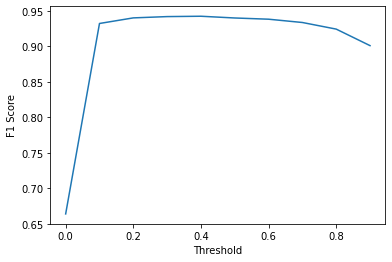

In [ ]:
# look for the best threshold. Once found, execute the previous section of code
thresholds = np.arange(0, 1.0, 0.1)
f1_scores = []

for threshold in thresholds:
    y_true = []
    y_pred = []
    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            inputs1, inputs2, labels = data
            labels = labels.float()
            outputs = model(torch.tensor(inputs1).to(torch.float32), torch.tensor(inputs2).to(torch.float32))
            outputs = outputs.float()
            pred = (outputs > threshold).type(torch.float32)
            y_true.extend(labels.tolist())
            y_pred.extend(pred.tolist())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate precision, recall, and MCC
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
    f1_scores.append(f1)

plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

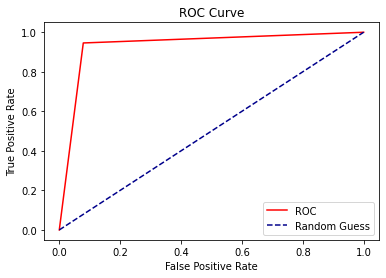

In [34]:

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

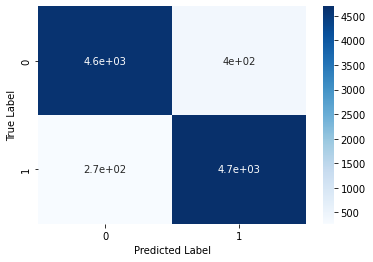

In [35]:
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

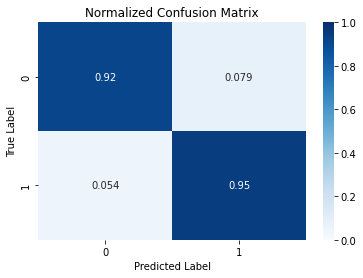

In [36]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the values to [0,1]
sns.heatmap(cm, annot=True, cmap='Blues', vmin=0, vmax=1) # set the color bar range to [0,1]
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()